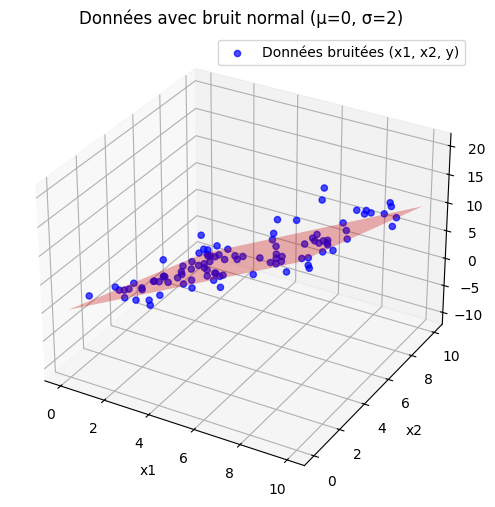

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres
np.random.seed(42)
n_samples = 100
n_features = 2
sigma = 2

# Générer des données x
x = np.random.rand(n_samples, n_features) * 10

# Coefficients de la droite réelle (vecteur β pour un modèle 2D)
beta = np.array([2, -1])

# Générer du bruit normal
noise = np.random.normal(loc=0, scale=sigma, size=n_samples)

# Générer y : y = x·β + bruit
y = x.dot(beta) + noise

# Visualisation en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Visualiser les points de données dans l'espace 3D
ax.scatter(x[:, 0], x[:, 1], y, color="blue", label="Données bruitées (x1, x2, y)", alpha=0.7)

# Visualiser la droite réelle (plan 3D)
x1_range = np.linspace(0, 10, 100)
x2_range = np.linspace(0, 10, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Calculer y pour chaque combinaison de x1 et x2 dans la grille
y_real_mesh = beta[0] * x1_mesh + beta[1] * x2_mesh

# Tracer le plan réel
ax.plot_surface(x1_mesh, x2_mesh, y_real_mesh, color="red", alpha=0.3, rstride=100, cstride=100)

# Labels et titre
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title(f"Données avec bruit normal (µ=0, σ={sigma})")
ax.legend()

# Afficher le graphique
plt.show()


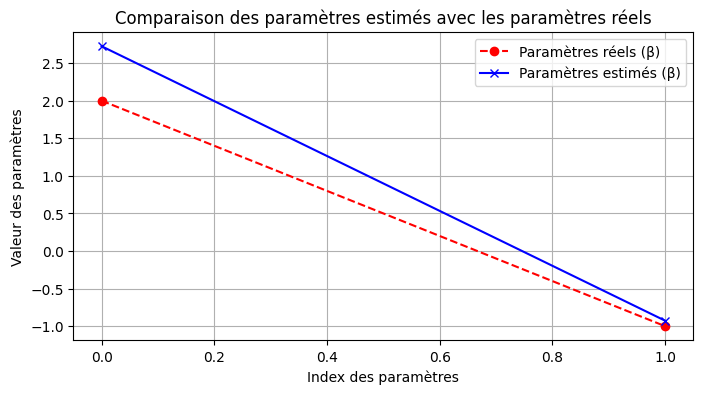

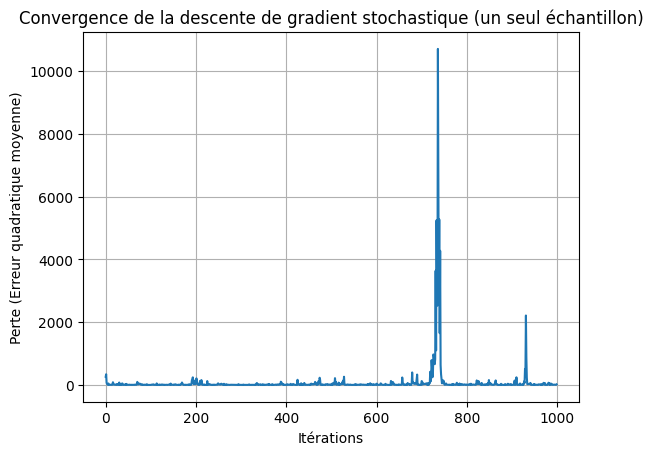

Paramètres estimés (β): [ 2.72442787 -0.92715583]
Paramètres réels (β): [ 2 -1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients de la droite réelle (vecteur β pour un modèle 2D)
beta_real = np.array([2, -1])
# Hyperparamètres de l'algorithme SGD
eta = 0.01
n_iterations = 1000
convergence_threshold = 1e-6
beta = np.random.randn(n_features)
# Historique de la perte pour visualisation
loss_history = []
# Algorithme de descente de gradient stochastique (SGD)
for iteration in range(n_iterations):
    index = np.random.randint(n_samples)
    x_sample = x[index:index+1]
    y_sample = y[index]
    y_pred = x_sample.dot(beta)
    gradient = -2 * x_sample.T.dot(y_sample - y_pred)
    beta = beta - eta * gradient
    loss = np.mean((y - x.dot(beta))**2)
    loss_history.append(loss)
    # Critère de convergence
    if iteration > 1 and abs(loss_history[-1] - loss_history[-2]) < convergence_threshold:
        print(f"Convergence atteinte après {iteration} itérations.")
        break
  # Visualisation des paramètres estimés vs réels
plt.figure(figsize=(8, 4))
plt.plot(beta_real, label="Paramètres réels (β)", marker='o', linestyle='dashed', color='red')
plt.plot(beta, label="Paramètres estimés (β)", marker='x', color='blue')
plt.xlabel('Index des paramètres')
plt.ylabel('Valeur des paramètres')
plt.title('Comparaison des paramètres estimés avec les paramètres réels')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation de la perte au fil des itérations
plt.plot(loss_history)
plt.xlabel('Itérations')
plt.ylabel('Perte (Erreur quadratique moyenne)')
plt.title('Convergence de la descente de gradient stochastique (un seul échantillon)')
plt.grid(True)
plt.show()
# Affichage des résultats
print("Paramètres estimés (β):", beta)
print("Paramètres réels (β):", beta_real)



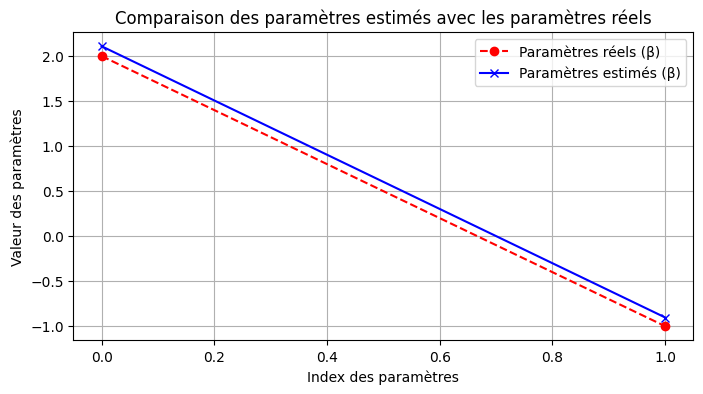

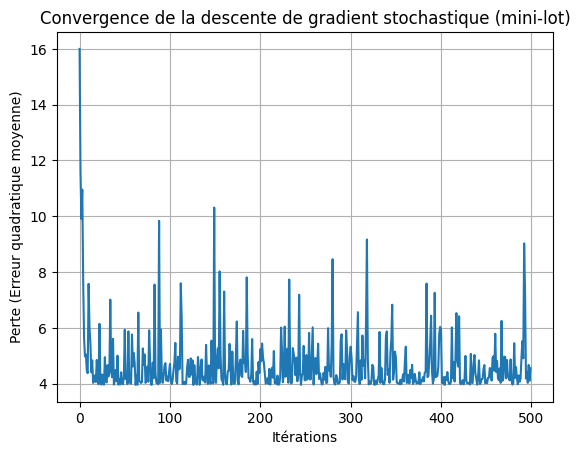

Paramètres estimés (β): [ 2.10948248 -0.90313967]
Paramètres réels (β): [ 2 -1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

beta_real = np.array([2, -1])
eta = 0.01
n_iterations = 500
batch_size = 10
convergence_threshold = 1e-6
# Initialisation des paramètres β
beta = np.random.randn(n_features)
loss_history = []
for iteration in range(n_iterations):
    indices = np.random.choice(n_samples, batch_size, replace=False)
    x_batch = x[indices]
    y_batch = y[indices]
    # Calcul des prédictions pour le mini-lot
    y_pred = x_batch.dot(beta)
    gradient = -2 * x_batch.T.dot(y_batch - y_pred) / batch_size
    # Mise à jour des paramètres β
    beta = beta - eta * gradient
    loss = np.mean((y - x.dot(beta))**2)
    loss_history.append(loss)
    # Critère de convergence : si la perte diminue moins de manière significative
    if iteration > 1 and abs(loss_history[-1] - loss_history[-2]) < convergence_threshold:
        print(f"Convergence atteinte après {iteration} itérations.")
        break


# Visualisation des paramètres estimés vs réels
plt.figure(figsize=(8, 4))
plt.plot(beta_real, label="Paramètres réels (β)", marker='o', linestyle='dashed', color='red')
plt.plot(beta, label="Paramètres estimés (β)", marker='x', color='blue')
plt.xlabel('Index des paramètres')
plt.ylabel('Valeur des paramètres')
plt.title('Comparaison des paramètres estimés avec les paramètres réels')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation de la perte au fil des itérations
plt.plot(loss_history)
plt.xlabel('Itérations')
plt.ylabel('Perte (Erreur quadratique moyenne)')
plt.title('Convergence de la descente de gradient stochastique (mini-lot)')
plt.grid(True)
plt.show()

# Affichage des résultats
print("Paramètres estimés (β):", beta)
print("Paramètres réels (β):", beta_real)


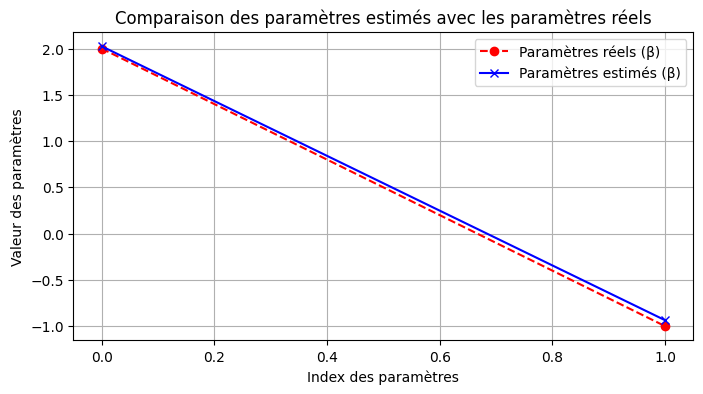

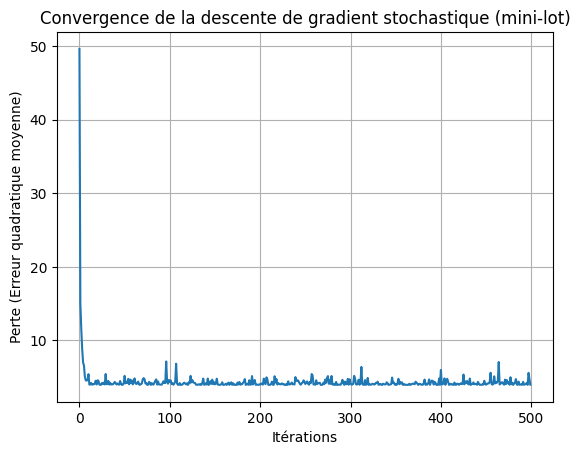

Paramètres estimés (β): [ 2.02484926 -0.93601115]
Paramètres réels (β): [ 2 -1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

beta_real = np.array([2, -1])
# Hyperparamètres de l'algorithme SGD
eta = 0.01
n_iterations = 500
batch_size = 20
convergence_threshold = 1e-6
beta = np.random.randn(n_features)
loss_history = []
for iteration in range(n_iterations):
    indices = np.random.choice(n_samples, batch_size, replace=False)
    x_batch = x[indices]
    y_batch = y[indices]
    y_pred = x_batch.dot(beta)
    gradient = -2 * x_batch.T.dot(y_batch - y_pred) / batch_size
    beta = beta - eta * gradient
    loss = np.mean((y - x.dot(beta))**2)
    loss_history.append(loss)
    # Critère de convergence : si la perte diminue moins de manière significative
    if iteration > 1 and abs(loss_history[-1] - loss_history[-2]) < convergence_threshold:
        print(f"Convergence atteinte après {iteration} itérations.")
        break


# Visualisation des paramètres estimés vs réels
plt.figure(figsize=(8, 4))
plt.plot(beta_real, label="Paramètres réels (β)", marker='o', linestyle='dashed', color='red')
plt.plot(beta, label="Paramètres estimés (β)", marker='x', color='blue')
plt.xlabel('Index des paramètres')
plt.ylabel('Valeur des paramètres')
plt.title('Comparaison des paramètres estimés avec les paramètres réels')
plt.legend()
plt.grid(True)
plt.show()


# Visualisation de la perte au fil des itérations
plt.plot(loss_history)
plt.xlabel('Itérations')
plt.ylabel('Perte (Erreur quadratique moyenne)')
plt.title('Convergence de la descente de gradient stochastique (mini-lot)')
plt.grid(True)
plt.show()
# Affichage des résultats
print("Paramètres estimés (β):", beta)
print("Paramètres réels (β):", beta_real)


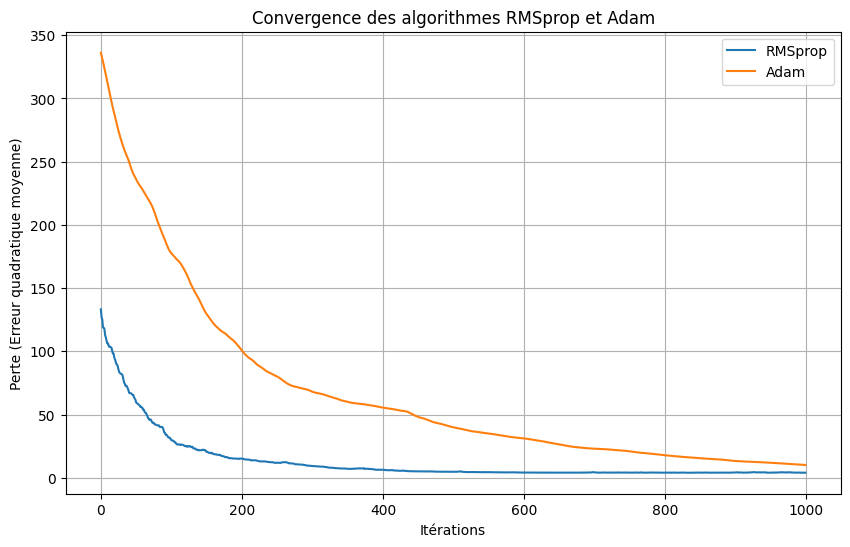

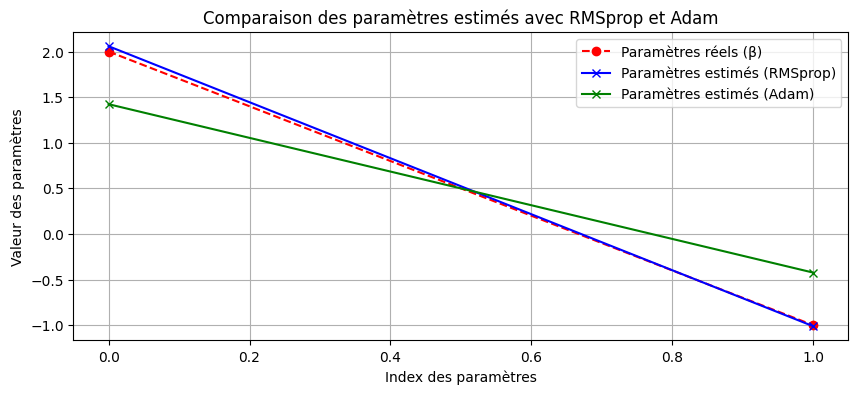

Paramètres estimés RMSprop (β): [ 2.05871053 -1.01157364]
Paramètres estimés Adam (β): [ 1.42301353 -0.42365762]
Paramètres réels (β): [ 2 -1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
np.random.seed(42)  # Reproductibilité
n_samples = 100     # Nombre de points
n_features = 2      # Dimension des données
sigma = 2           # Écart-type du bruit

# Générer des données x
x = np.random.rand(n_samples, n_features) * 10  # x dans [0, 10] pour chaque feature

# Coefficients de la droite réelle (vecteur β pour un modèle 2D)
beta_real = np.array([2, -1])
# Générer du bruit normal
noise = np.random.normal(loc=0, scale=sigma, size=n_samples)

# Générer y : y = x·β + bruit
y = x.dot(beta_real) + noise

# Initialisation des paramètres β
beta_rmsprop = np.random.randn(n_features)
beta_adam = np.random.randn(n_features)

# Hyperparamètres communs
eta = 0.01
n_iterations = 1000
epsilon = 1e-8

# Historique de la perte pour visualisation
loss_history_rmsprop = []
loss_history_adam = []

# RMSprop hyperparamètres
rho = 0.9
grad_squared = np.zeros(n_features)

# Adam hyperparamètres
beta1 = 0.9
beta2 = 0.999
m = np.zeros(n_features)
v = np.zeros(n_features)

# Algorithme RMSprop et Adam
for iteration in range(1, n_iterations + 1):
    # Sélectionner un échantillon aléatoire
    index = np.random.randint(n_samples)
    x_sample = x[index:index+1]
    y_sample = y[index]

    # Calcul des prédictions pour RMSprop et Adam
    y_pred_rmsprop = x_sample.dot(beta_rmsprop)
    y_pred_adam = x_sample.dot(beta_adam)

    # Calcul des gradients
    gradient_rmsprop = -2 * x_sample.T.dot(y_sample - y_pred_rmsprop)
    gradient_adam = -2 * x_sample.T.dot(y_sample - y_pred_adam)

    # RMSprop
    grad_squared = rho * grad_squared + (1 - rho) * gradient_rmsprop**2
    beta_rmsprop -= eta * gradient_rmsprop / (np.sqrt(grad_squared) + epsilon)
    loss_rmsprop = np.mean((y - x.dot(beta_rmsprop))**2)
    loss_history_rmsprop.append(loss_rmsprop)

    # Adam
    m = beta1 * m + (1 - beta1) * gradient_adam
    v = beta2 * v + (1 - beta2) * gradient_adam**2
    m_hat = m / (1 - beta1**iteration)
    v_hat = v / (1 - beta2**iteration)
    beta_adam -= eta * m_hat / (np.sqrt(v_hat) + epsilon)
    loss_adam = np.mean((y - x.dot(beta_adam))**2)
    loss_history_adam.append(loss_adam)

# Visualisation de la perte
plt.figure(figsize=(10, 6))
plt.plot(loss_history_rmsprop, label="RMSprop")
plt.plot(loss_history_adam, label="Adam")
plt.xlabel('Itérations')
plt.ylabel('Perte (Erreur quadratique moyenne)')
plt.title('Convergence des algorithmes RMSprop et Adam')
plt.legend()
plt.grid(True)
plt.show()

# Comparaison des paramètres estimés
plt.figure(figsize=(10, 4))
plt.plot(beta_real, label="Paramètres réels (β)", marker='o', linestyle='dashed', color='red')
plt.plot(beta_rmsprop, label="Paramètres estimés (RMSprop)", marker='x', color='blue')
plt.plot(beta_adam, label="Paramètres estimés (Adam)", marker='x', color='green')
plt.xlabel('Index des paramètres')
plt.ylabel('Valeur des paramètres')
plt.title('Comparaison des paramètres estimés avec RMSprop et Adam')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats
print("Paramètres estimés RMSprop (β):", beta_rmsprop)
print("Paramètres estimés Adam (β):", beta_adam)
print("Paramètres réels (β):", beta_real)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixer les paramètres de base
np.random.seed(42)
n_samples = 100
n_features = 2
beta_real = np.array([2, 3])

# Niveaux de bruit
noise_levels = [1, 3, 5]
datasets = []

# Générer des données pour chaque niveau de bruit
for sigma in noise_levels:
    x = np.random.rand(n_samples, n_features) * 10
    noise = np.random.normal(loc=0, scale=sigma, size=n_samples)
    y = x.dot(beta_real) + noise
    datasets.append((x, y, sigma))


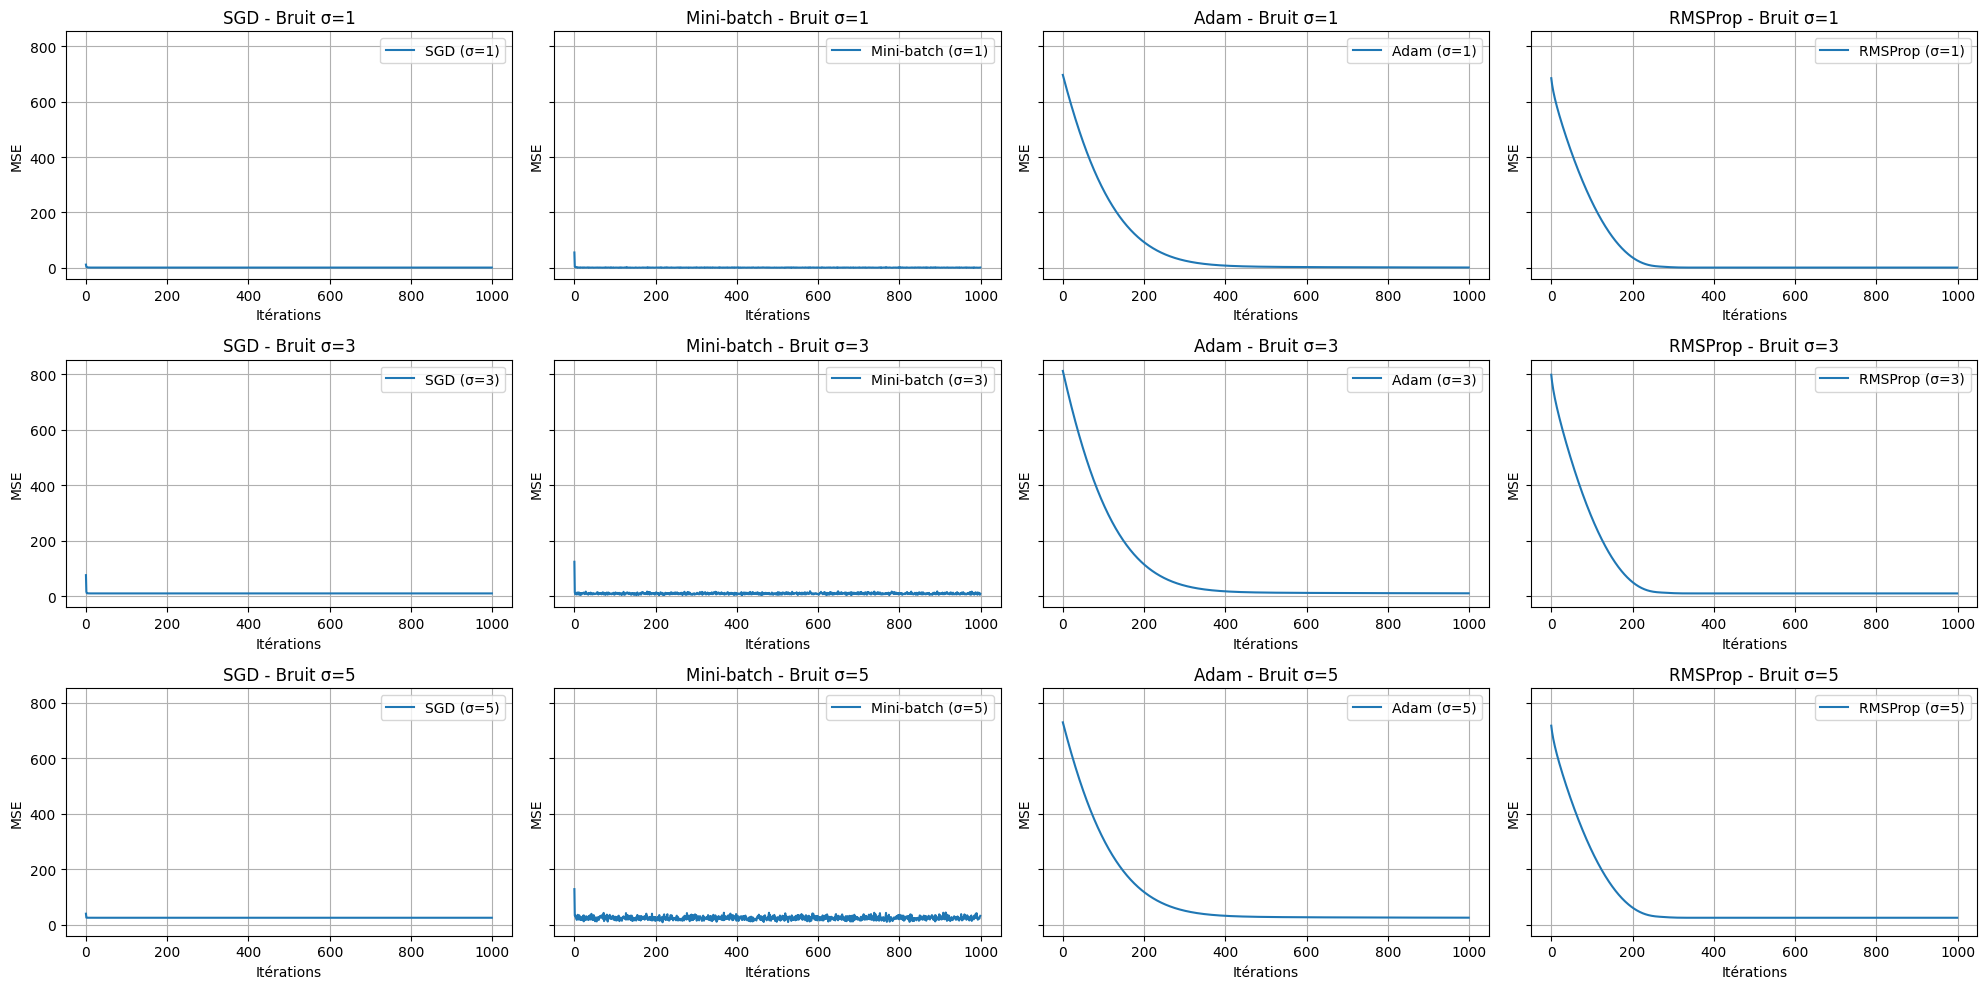

In [ ]:
def sgd(x, y, learning_rate=0.01, max_iter=1000):
    m, n = x.shape
    theta = np.zeros(n)
    losses = []

    for _ in range(max_iter):
        gradient = -2 * (x.T.dot(y - x.dot(theta))) / m
        theta -= learning_rate * gradient
        loss = np.mean((y - x.dot(theta))**2)
        losses.append(loss)
    return losses


def mini_batch(x, y, batch_size=20, learning_rate=0.01, max_iter=1000):
    m, n = x.shape
    theta = np.zeros(n)
    losses = []

    for _ in range(max_iter):
        indices = np.random.choice(m, batch_size, replace=False)
        x_batch = x[indices]
        y_batch = y[indices]

        gradient = -2 * (x_batch.T.dot(y_batch - x_batch.dot(theta))) / batch_size
        theta -= learning_rate * gradient
        loss = np.mean((y_batch - x_batch.dot(theta))**2)
        losses.append(loss)
    return losses


def adam(x, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000):
    m, n = x.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)
    v_t = np.zeros(n)
    losses = []

    for t in range(1, max_iter + 1):
        gradient = -2 * (x.T.dot(y - x.dot(theta))) / m
        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * (gradient**2)

        m_hat = m_t / (1 - beta1**t)
        v_hat = v_t / (1 - beta2**t)

        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        loss = np.mean((y - x.dot(theta))**2)
        losses.append(loss)
    return losses


def rmsprop(x, y, learning_rate=0.01, beta=0.9, epsilon=1e-8, max_iter=1000):
    m, n = x.shape
    theta = np.zeros(n)
    v = np.zeros(n)
    losses = []

    for _ in range(max_iter):
        gradient = -2 * (x.T.dot(y - x.dot(theta))) / m
        v = beta * v + (1 - beta) * (gradient**2)

        theta -= learning_rate * gradient / (np.sqrt(v) + epsilon)
        loss = np.mean((y - x.dot(theta))**2)
        losses.append(loss)
    return losses


# Visualiser la convergence pour chaque niveau de bruit
fig, axes = plt.subplots(len(noise_levels), 4, figsize=(20, 10), sharey=True)

algorithms = ["SGD", "Mini-batch", "Adam", "RMSProp"]

for i, (x, y, sigma) in enumerate(datasets):
    for j, algo in enumerate(algorithms):
        if algo == "SGD":
            losses = sgd(x, y)
        elif algo == "Mini-batch":
            losses = mini_batch(x, y)
        elif algo == "Adam":
            losses = adam(x, y)
        elif algo == "RMSProp":
            losses = rmsprop(x, y)

        axes[i, j].plot(losses, label=f"{algo} (σ={sigma})")
        axes[i, j].set_title(f"{algo} - Bruit σ={sigma}")
        axes[i, j].set_xlabel("Itérations")
        axes[i, j].set_ylabel("MSE")
        axes[i, j].grid(True)
        axes[i, j].legend()

plt.tight_layout()
plt.show()

